# **8. Expectation, Mean and Variance**

In [1]:
import itertools
import random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

**Outline**

1. Variable Random
2. Case 1 - Ekspektasi Bonus Gaji Data Scientist
3. Case 2 - Roulette Problem
4. Case 3 - The Quiz Problem

## **Review Variable Random**
---

### **Expectation**

Dari materi yang sudah dipelajari di video:

- Expectation atau Expected Value adalah **rata rata** nilai dari Variable Random 
- Dimana nilai Variable Random merepresentasikan **kejadian dalam ruang sampel** dalam bentuk numerik. 
- Expected Value dari Variable Random bisa dicari dengan menghitung:
$$ \text{E}[X] = \sum_i{x_ip_x(x_i)}$$

### **Variance**
- Variance adalah nilai kuadrat dari rata rata sebaran nilai variable random dari rata-ratanya (expected value)
- Variance adalah merepresentasikan persebaran data
- Variance sulit untuk diinterpretasikan, gunakan standar deviasi untuk memudahkan interpretasi dalam skala data asli
- Variance dari Variable Random bisa dicari dengan menghitung:
$$ \text{Var}[X] = \text{E}[(X-\text{E}[X])^2]$$

### **Expectation and Variance in Variable Random Distribution**

|Distribution|Expectation|Variance|
|------------|-----------|--------|
|Bernoulli|$$\text{E}[X] = p$$|$$\text{Var}[X] = p(1-p)$$|
|Uniform|$$\text{E}[X] = \frac{b-a}{2}$$|$$\text{Var}[X] = \frac{(b-a)(b-a+2)}{12}$$|
|Binomial|$$\text{E}[X] = np$$|$$\text{Var}[X] = np(1-p)$$|
|Geometric|$$\text{E}[X] = \frac{1}{p}$$|$$\text{Var}[X] = \frac{1-p}{p^2}$$|

## **Study Case 1: Expectasi Bonus Gaji Data Scientist**
___


Kita coba bahas kasus yang telah dijelaskan pada slide dalam video.

Dalam kasus ini, Budi adalah seorang Data Scientist yang telah bekerja di Google selama 36 bulan.
* Gaji pokok Budi adalah USD 11.000/bulan
* Lalu, berdasarkan pengamatan ia bekerja selama 36 bulan. Peluang bonus yang ia terima adalah:
    * USD 2000 P = 0.5
    * USD 1000 P = 0.25
    * USD 500 P = 1/6
    * USD 100 P = 1/12

Kira-kira berapa **total bonus** paling mungkin yang dia dapat selama setahun?




Pertama, kita akan definisikan sebuah fungsi untuk menghitung jumlah kejadian di sebuah ruang sampel:

In [2]:
class Dist(Counter): 
    "A Distribution of {outcome: frequency} pairs."

Sehingga

In [3]:
Dist(['TT','HT','TH','HH','HT'])

Dist({'HT': 2, 'TT': 1, 'TH': 1, 'HH': 1})

Lalu, kita juga akan definisikan fungsi-fungsi berikut untuk menghitung peluang dari kejadian

In [4]:
def cases(outcomes): 
    "The total frequency of all the outcomes."
    return sum(Dist(outcomes).values())

def favorable(event, space):
    "A distribution of outcomes from the sample space that are in the event."
    space = Dist(space)
    return Dist({x: space[x] 
                 for x in space if x in event})

def Fraction(n, d): 
    "Calculating the probability given outcome n and sample space d"
    return n / d

def P(event, space): 
    "The probability of an event, given a sample space."
    return Fraction(cases(favorable(event, space)), 
                    cases(space))

Jika diketahui peluangnya seperti itu, kita dapat berasumsi bahwa:
* Selama 36 bulan bekerja, total 18 bulan menerima bonus USD 2000 / bulan
* Selama 36 bulan bekerja, total 9 bulan menerima bonus USD 1000 / bulan
* Selama 36 bulan bekerja, total 6 bulan menerima bonus USD 500 / bulan
* Selama 36 bulan bekerja, total 3 bulan menerima bonus USD 100 / bulan

In [5]:
bonus = Dist({2000: 18, 1000:9, 500:6, 100:3})

Lalu, kita akan buat fungsi untuk mensimulasikan jumlah total bonus yang bisa diperoleh selama setahun:

In [6]:
def bonus_sim(n_sim, bonus_dist):
    outcomes = []
    for _ in range(n_sim):
        total_bonus = 0
        for month in range(12):
            bonus_month = random.choices(*zip(*bonus_dist.items()))[0]
            total_bonus += bonus_month
        outcomes.append(total_bonus)
    return Dist(outcomes)

In [7]:
total_bonus_dist = bonus_sim(100000, bonus)

Kita coba lihat, 5 nilai yang paling sering muncul beserta 

In [8]:
total_bonus_dist.most_common(5)

[(16100, 3721), (15600, 3464), (17100, 3432), (16600, 3407), (17500, 3228)]

Nilai yang paling sering muncul adalah $16100$. Sama seperti perhitungan yang kita telah lakukan di materi video.

Kita lihat distribusinya:

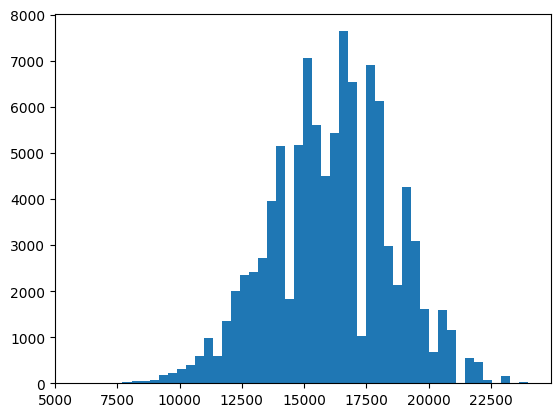

In [9]:
list_bonus = [[labels]*values for labels, values in total_bonus_dist.items()]
flat_bonus = [x for xs in list_bonus for x in xs]

plt.hist(flat_bonus, bins=50)
plt.show()

## **Study Case 2: Roulette Problem**

___

John merupakan seorang pria paruh baya yang kecanduan Judi. Dia kecanduan bermain _Roulette_ dengan selalu menaruh taruhan sebesar **1 Dollar** di angka 13.
* Smith merupakan teman John dan dia ingin "menyembuhkan" kecanduan John dengan berusaha memberikan rasa "kapok".
* Dia ingin memberi "pelajaran" dengan cara yang disukai John, yaitu dia bertaruh dengan John. 
* Jika John selalu kalah pada 36 kali putaran dadu, maka John membayar Smith 20 Dollar.
* Jika John menang pada 36 kali putaran dadu, Smith membayar John 20 Dollar.
* Kira-kira apakah cara ini efektif?

> **Note:** Pada sebuah permainan _Roulette_, terdapat 38 angka dengan peluang muncul yang sama. Jika pada sebuah putaran angka dia terpilih. Maka dia akan mendapat 35x taruhan dia. Jika dia kalah, maka dia akan kehilangan uang yang dia taruhkan.

Mari coba kita tulis apa yang diketahui 
1. Peluang John untuk menang pada 1 kali putaran adalah $\frac{1}{38}$
2. Jika John tidak pernah menang dalam 36 kali putaran maka dia **kehilangan** 36 dollar
3. Jika dia menang **satu**. Dia akan mendapat 35 dollar. Namun akan kehilangan 35 dollar di putaran yang kalah. Sehingga impas.
4. Namun, ini cukup untuk dia menang 20 dollar dari Smith.
  



Kita akan coba simulasikan hal ini:

Untuk mensimulasikan kemenangan dari _roulette_. Kita akan menggunakan distribusi **Binomial**. Misal:

In [10]:
np.random.seed(42)

In [11]:
roulette = np.random.binomial(36, 1/38, size=50)
roulette

array([0, 3, 1, 1, 0, 0, 0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 3, 3, 2, 0, 0, 1, 1, 0, 1, 0, 2,
       0, 1, 0, 1, 1, 0])

Kita dapat menginterpretasi hasilnya sebagai:
* Pada percobaan pertama, kita putar _roulette_ sebanyak 36 kali dengan kemungkinan menang 1/38. Hasilnya adalah kita tidak pernah menang.
* Pada percobaan kedua, kita putar _roulette_ sebanyak 36 kali dengan kemungkinan menang 1/38. Hasilnya adalah kita menang 3 kali.
* Pada percobaan ketiga, kita putar _roulette_ sebanyak 36 kali dengan kemungkinan menang 1/38. Hasilnya adalah kita menang 1 kali.

Untuk tiap percobaan akan kita hitung berapa uang yang akan diterima oleh John:

In [12]:
kerugian_roul = -36 + roulette # Jika menang 0 kali, maka akan rugi 36, menang 1 kali rugi, 35, dst.
keuntungan_roul = 35*roulette # Jika menang 0 kali, untung 0, menang 1: 35, menang 2: 70, dst.
total_roul = kerugian_roul + keuntungan_roul
total_roul

array([-36,  72,   0,   0, -36, -36, -36,  36,   0,   0, -36,  72,  36,
       -36, -36, -36, -36,   0,   0, -36,   0, -36, -36, -36,   0,  36,
       -36,   0,   0, -36,   0, -36, -36,  72,  72,  36, -36, -36,   0,
         0, -36,   0, -36,  36, -36,   0, -36,   0,   0, -36])

Lalu, bagaimana dengan keuntungan atau kerugian dari taruhan dengan Smith?
* Pertama, John menang jika dia menang minimal 1 _roulette_ dalam 36 putaran.

In [13]:
taruhan = (roulette > 0).astype(int)
taruhan

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0])

Lalu kita hitung keuntungan dan kerugiannya

In [14]:
keuntungan_taruh = 20 * taruhan
kerugian_taruh = -20 * (1-taruhan)
total_taruhan = keuntungan_taruh + kerugian_taruh
total_taruhan

array([-20,  20,  20,  20, -20, -20, -20,  20,  20,  20, -20,  20,  20,
       -20, -20, -20, -20,  20,  20, -20,  20, -20, -20, -20,  20,  20,
       -20,  20,  20, -20,  20, -20, -20,  20,  20,  20, -20, -20,  20,
        20, -20,  20, -20,  20, -20,  20, -20,  20,  20, -20])

Lalu kita hitung total uang yang diterima di setiap percobaan. Dan kita rata-rata

In [15]:
total_uang = total_roul + total_taruhan
total_uang

array([-56,  92,  20,  20, -56, -56, -56,  56,  20,  20, -56,  92,  56,
       -56, -56, -56, -56,  20,  20, -56,  20, -56, -56, -56,  20,  56,
       -56,  20,  20, -56,  20, -56, -56,  92,  92,  56, -56, -56,  20,
        20, -56,  20, -56,  56, -56,  20, -56,  20,  20, -56])

In [16]:
rata_pendapatan = np.mean(total_uang)
rata_pendapatan

np.float64(-7.12)

secara rata-rata, John **rugi** sebesar 7.12 dollar. Namun itu adalah rata-rata dari 50 percobaan. Kita coba rangkum dan lakukan percobaan dengan jumlah yang lebih banyak. 

In [17]:
def roulette_sim(n):
    roulette = np.random.binomial(36, 1/38, size=n)
    kerugian_roul = -36 + roulette # Jika menang 0 kali, maka akan rugi 36, menang 1 kali rugi, 35, dst.
    keuntungan_roul = 35*roulette # Jika menang 0 kali, untung 0, menang 1: 35, menang 2: 70, dst.
    total_roul = kerugian_roul + keuntungan_roul

    taruhan = (roulette > 0).astype(int)

    keuntungan_taruh = 20 * taruhan
    kerugian_taruh = -20 * (1-taruhan)
    total_taruhan = keuntungan_taruh + kerugian_taruh

    total_uang = total_roul + total_taruhan
    rata_pendapatan = np.mean(total_uang)
    return rata_pendapatan

In [18]:
rata_rata = roulette_sim(1000000)
rata_rata

np.float64(2.829988)

Dari sejuta kali simulasi, secara rata-rata John bisa mendapatkan uang sebanyak 2.77 dollar di setiap percobaan.

Sehingga "treatment" yang dilakukan Smith tidak efektif!


## **Study Case 3: The Quiz Problem (Decision Making Simulation)**
---

- Misalnya anda diberikan 2 pertanyaan dan diminta memutuskan pertanyaan mana yang harus dijawab terlebih dahulu
  - Peluang pertanyaan 1 dijawab dengan benar adalah 0.8 dan anda akan mendapatkan hadiah $\$100$
  - Peluang pertanyaan 2 dijawab dengan benar adalah 0.5 dan anda akan mendapatkan hadiah $\$200$
- Jika pertanyaan pertama yang diambil tidak dijawab dengan benar, quiz akan diberhentikan dan anda tidak boleh menjawab pertanyaan selanjutnya.
- Jika pertanyaan pertama yang diambil dijawab dengan benar, anda boleh menjawab pertanyaan kedua
- Pertanyaan nomor berapa yang anda akan jawab pertama kali agar memaksimalkan harapan hadian uang yang diterima?
___

Untuk mejawab permasalahan diatas kita bisa melakukan pendekatan simulasi menjawab pertanyaan:
- Generate data hasil jawaban pertanyaan 1 dengan probabilitas dapat terjawab sebesar 0.8 menggunakan Variable Random Bernoulli, manfaatkan Variable Random Binomial dengan n = 1. 
- Data yang dibuat adalah hasil jawaban dari 100000 pertanyaan 1

In [19]:
q1 = np.random.binomial(n = 1, p = 0.8, size=100000)
q1

array([1, 0, 1, ..., 1, 1, 1])

- Generate data hasil jawaban pertanyaan 2 dengan probabilitas dapat terjawab sebesar 0.5 menggunakan Variable Random Bernoulli, manfaatkan Variable Random Binomial dengan n = 1. 
- Data yang dibuat adalah hasil jawaban dari 100000 pertanyaan 2

In [20]:
q2 = np.random.binomial(n = 1, p = 0.8, size=100000)
q2

array([1, 1, 0, ..., 1, 1, 1])

Hitung total uang yang didapatkan jika ada 2 skenario:

- Skenario 1: Jika pertanyaan 1 dijawab terlebih dahulu:
    - case pertanyaan 1 salah : mendapatkan $\$0$
    - case pertanyaan 1 benar pertanyaan 2 salah : mendapatkan $\$100$
    - case pertanyaan 1 benar pertanyaan 2 benar : mendapatkan $\$300$

- Skenario 2: Jika pertanyaan 2 dijawab terlebih dahulu:
    - case pertanyaan 2 salah : mendapatkan $\$0$
    - case pertanyaan 2 benar pertanyaan 1 salah : mendapatkan $\$200$
    - case pertanyaan 2 benar pertanyaan 1 benar : mendapatkan $\$300$

In [21]:
#ganti summary aja

earn_q1_q2 = 0
earn_q1 = 0
earn_q2_q1 = 0
earn_q2 = 0
earn_ = 0
for i in range(100000):  
  # Uang yang didapatkan jika pertanyaan 1 salah, pertanyaan 2 salah
  if (q1[i]==0 and q2[i]==0):
    earn_+=0
  # Uang yang didapatkan jika pertanyaan 1 benar, pertanyaan 2 salah
  elif (q1[i]==1 and q2[i]==0):
    earn_q1+=100
  # Uang yang didapatkan jika pertanyaan 1 benar, pertanyaan 2 benar  
  elif (q1[i]==1 and q2[i]==1):
    earn_q1_q2+=300
  # Uang yang didapatkan jika pertanyaan 2 benar, pertanyaan 1 salah 
  elif (q1[i]==0 and q2[i]==1):
    earn_q2+=200

### Skenario pertanyaan 1 dijawab terlebih dahulu

In [22]:
# pendapatan uang jika memakai skenario 1
skenario_1 = earn_ + earn_q1_q2 + earn_q1
skenario_1

20828000

In [23]:
# rata-rata pendapatan skenario 1
expected_earn_1 = skenario_1/100000
expected_earn_1

208.28

### Skenario pertanyaan 2 dijawab terlebih dahulu

In [24]:
# pendapatan uang jika memakai skenario 1 dari 100 ribu percobaan
skenario_2 = earn_ + earn_q1_q2 + earn_q2
skenario_2

22444300

In [25]:
# rata-rata pendapatan skenario 2 dari 100 ribu percobaan
expected_earn_2 = skenario_2/100000
expected_earn_2

224.443

Total pendapatkan menunjukkan akan lebih untung jika kita menggunakan skenario menjawab pertanyaan 1 terlebih dahulu